In [ ]:
You are a data scientist working for a healthcare company, and you have been tasked with creating a 
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been 
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes 
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to 
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical 
variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use 
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, 
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important 
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and 
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the 
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and 
risks.
Here’s the dataset link: 
Your goal is to create a decision tree to predict whether a patient has diabetes based on the other

In [5]:
# Reading Dataset from source
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# Checking Value counts
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: title={'center': 'Value Counts for Outcome'}, xlabel='Outcome', ylabel='Value Counts'>

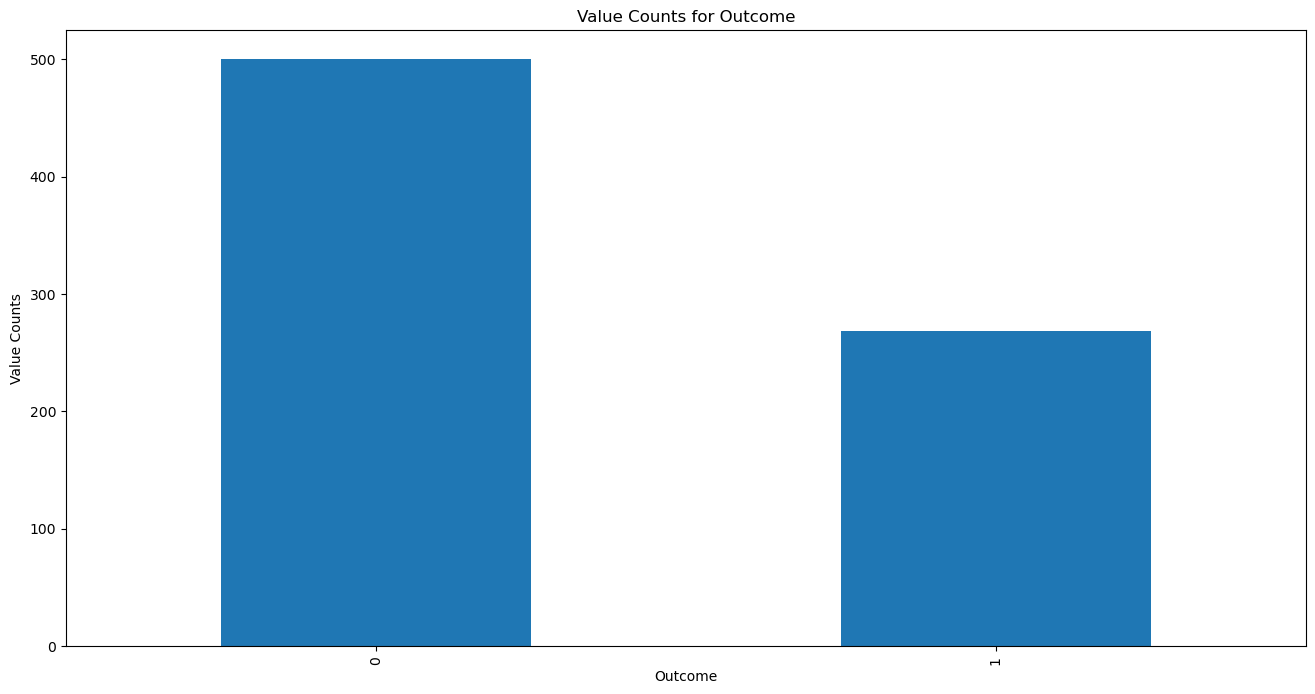

In [10]:
# Visualising Value Counts
df['Outcome'].value_counts().plot(kind='bar',
                                  xlabel='Outcome',
                                  ylabel='Value Counts',
                                  title='Value Counts for Outcome',
                                  figsize=(16,8))

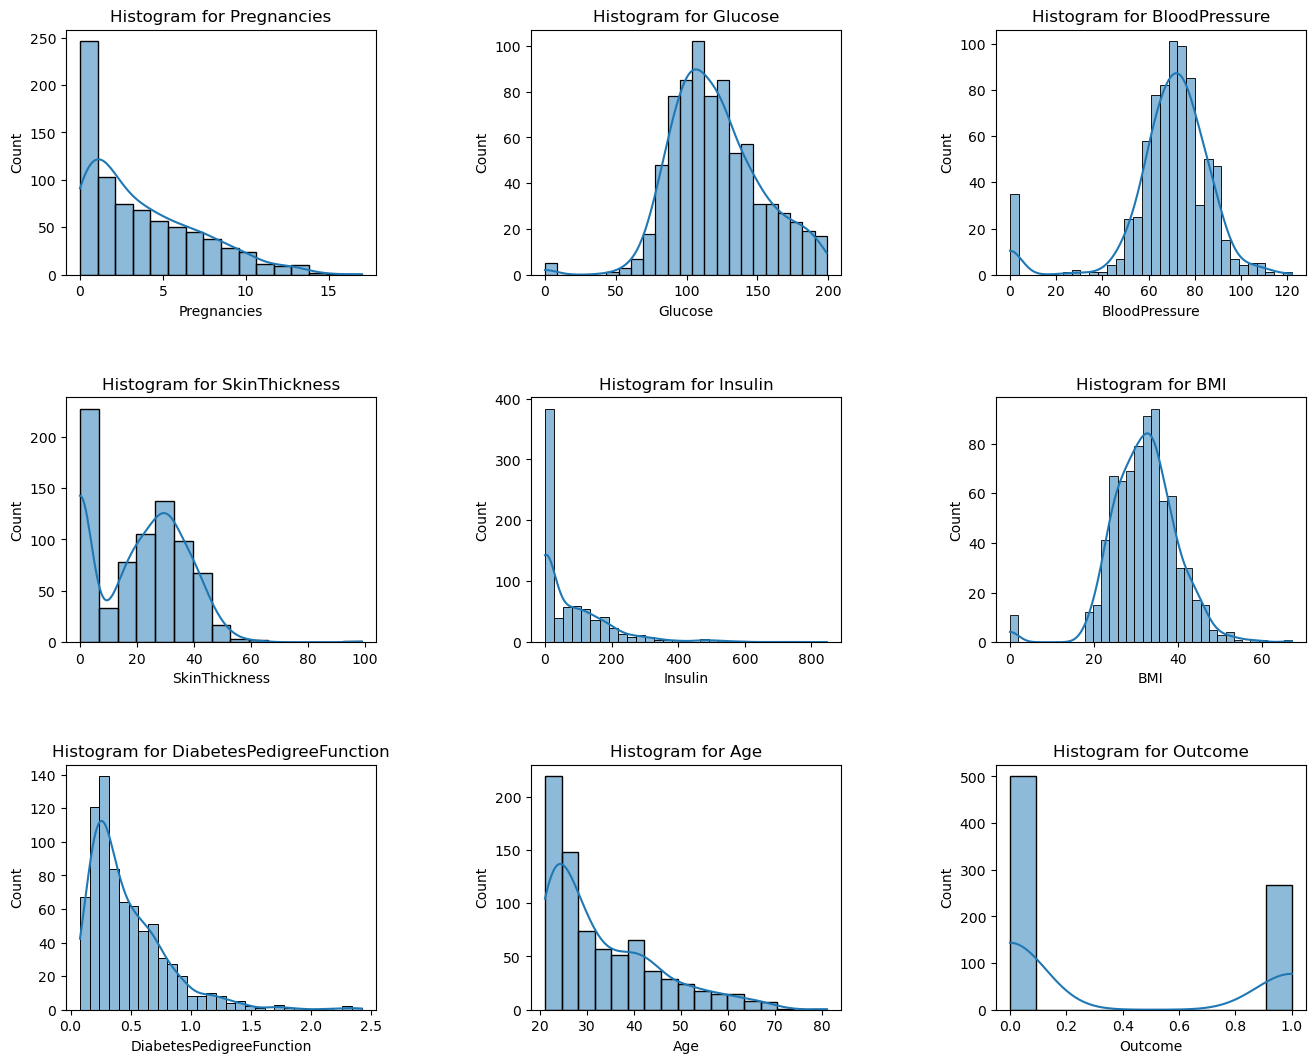

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize counter for subplots
x = 1
plt.figure(figsize=(16,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df.columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.histplot(data=df,x=i,kde='true')
    plt.title(f'Histogram for {i}')
plt.show()

In [ ]:
### Insights for above Univariate Analysis
1. `Glucose` feature has 0 values which does not make sense, need to replace 0 values with median.
2. `Skin Thickness` feature also has 0 values which also does not make sense, need to replace 0 values with median.
3. `Insulin` feature also has 0 values which does not make sense, replace this 0 values with median.
4. `BMI` feature also has 0 values which does not make sense, replace this 0 values with median.
5. `Blood Pressure` feature has 0 values which does not make sense, replace this 0 values with median. 

In [ ]:
## Cleaning the data

In [12]:
cols_zero_val = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [13]:
# How many 0 values in above columns
print('Zero Values in the Data which dont make sense:')
for i in cols_zero_val:    
    print(f'{i} : {len(df[df[i]==0])}')

Zero Values in the Data which dont make sense:
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [14]:
for i in cols_zero_val:
    df[i] = df[i].replace(0,df[i].median())

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [17]:
# Seperate Dependent and Independent Variables
X = df.drop(labels=['Outcome'],axis=1)
Y = df[['Outcome']]

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [20]:
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25, random_state=42)

In [22]:
xtrain.shape

(576, 8)

In [23]:
xtest.shape

(192, 8)

In [ ]:
Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use 
cross-validation to optimize the hyperparameters and avoid overfitting.

In [24]:
# Defining the parameters for GridSearchCV
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':list(range(1,13)),
    'max_features':['sqrt','log2']
}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc,param_grid=parameters,cv=5,scoring='roc_auc')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [26]:
gscv.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [27]:
gscv.best_score_

0.7831303981106613

In [29]:
dtc_best = gscv.best_estimator_

In [30]:
dtc_best.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features='log2')

In [ ]:
Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, 
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [31]:
ypred_test = dtc_best.predict(xtest)

In [32]:
ypred_test

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       123
           1       0.60      0.52      0.56        69

    accuracy                           0.70       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.70      0.70      0.70       192



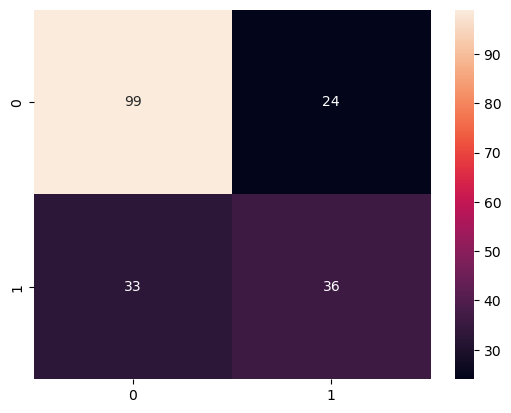

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf, annot=True,fmt='d')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score
acc_test = accuracy_score(ytest, ypred_test)
print(f'Accuracy Score for test data is {acc_test:.4f}')

Accuracy Score for test data is 0.7031


In [36]:
from sklearn.metrics import roc_auc_score
ypred_prob = dtc_best.predict_proba(xtest)[:,-1]
auc = roc_auc_score(ytest,ypred_prob)
print(f'ROC-AUC Score for the model is : {auc:.4f}')

ROC-AUC Score for the model is : 0.7276


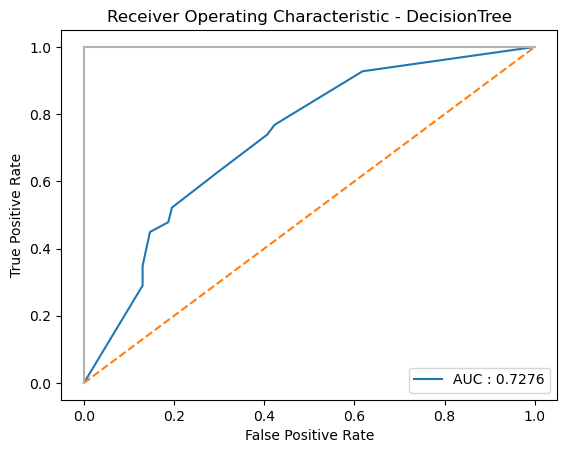

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(ytest,ypred_prob)
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr, label=f'AUC : {auc:.4f}')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important 
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and 
trends.

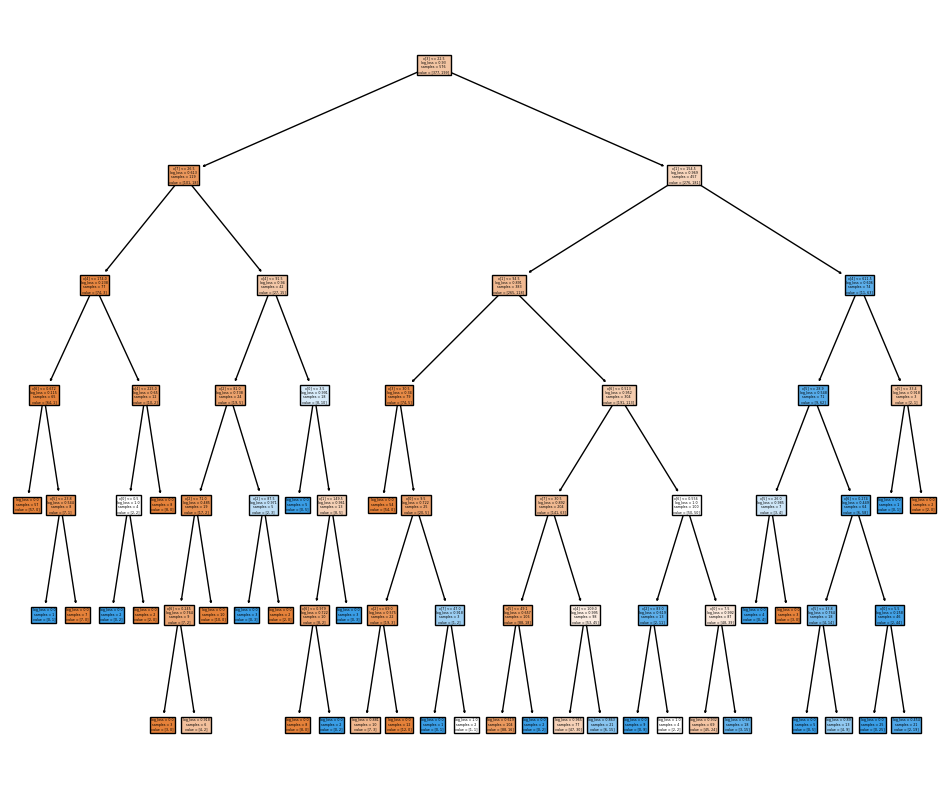

In [38]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtc_best,filled=True)
plt.show()

In [39]:
imp = dtc_best.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

Glucose                     0.331891
Age                         0.117250
SkinThickness               0.110592
DiabetesPedigreeFunction    0.106683
BMI                         0.094691
Pregnancies                 0.094283
Insulin                     0.072991
BloodPressure               0.071620
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances'}, ylabel='Importance'>

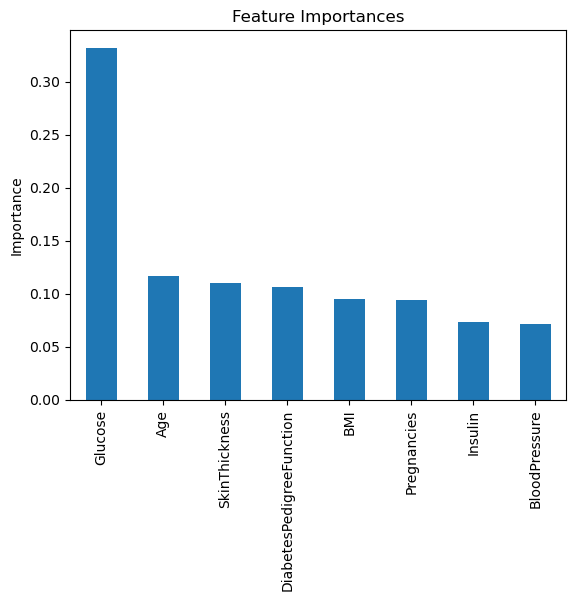

In [40]:
imp.plot(kind='bar',ylabel='Importance',title='Feature Importances')

In [ ]:
### Top 4 most important Features for Predicting Diabetes are :
1. `Glucose`
2. `Pregnancies`
3. `BMI`
4. `Age`

In [ ]:
Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the 
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and 
risks